# SLU10 - Metrics for Regression: Exercise Notebook

In this notebook, you will implement:
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Coefficient of Determination (R²)
    - Adjusted R²
    - Scikitlearn metrics
    - Using metrics for k-fold cross validation


Start by loading the data we will use to fit a linear regression - hopefully you still have SLU07 in your memory - and fitting the LinearRegression estimator from scikitlearn:

In [1]:
# Base imports
import math
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

data = load_boston()

x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
np.random.seed(42)

x_housing = x.values
y_housing = y.values

lr = LinearRegression()
lr.fit(x_housing, y_housing)

y_hat_housing = lr.predict(x_housing)
betas_housing = pd.Series([lr.intercept_] + list(lr.coef_))

## 1 Metrics

We will start by covering the metrics we learned in the unit, in particular a set of related metrics:

- Mean Absolute Error

$$MAE = \frac{1}{N} \sum_{n=1}^N \left| y_n - \hat{y}_n \right|$$


- Mean Squared Error

$$MSE = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2$$


- Root Mean Squared Error

$$RMSE = \sqrt{MSE}$$

### 1.1 Mean Absolute Error

Implement the Mean Absolute Error in the function below. 

**NOTE**: Notice that we've added a variable to get the sign of the error. This is just a sanity check for the function and is not necessary for the implementation, so do not worry about it and just implement each step as stated in the comments:

In [3]:
def mean_absolute_error(y_pred, y): 
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        
    Returns: 
        mae : float with Mean Absolute Error
        sn_check : integer with sign of sum of errors for sanity check in tests
    """
    # 1) Compute the error.
    # error = ...
    # YOUR CODE HERE
    error= y-y_pred    
    # 2) Compute the absolute value of the errors for each sample
    # abs_error = ...
    # YOUR CODE HERE
    abs_error = np.abs(error)
    
    # 3) Compute the mean of the absolute value of the errors
    mae = abs_error.mean()
    # YOUR CODE HERE
    
    sn_check = np.sign(np.sum(error))
    return mae, sn_check

Check the outputs of your function match the results below:

In [4]:
np.random.seed(42)
mae, error_sgn = mean_absolute_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.20867273347264428, mae)
assert error_sgn == -1

np.random.seed(59)
mae, error_sgn = mean_absolute_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.2578130479011501, mae)
assert error_sgn == -1

np.random.seed(5123)
mae, error_sgn = mean_absolute_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.30802805261201044, mae)
assert error_sgn == 1

Now compute the Mean Absolute Error for our housing dataset:

In [5]:
MAE, _ = mean_absolute_error(y_hat_housing, y_housing)
print('Mean Absolute Error Housing dataset: {}'.format(MAE))

Mean Absolute Error Housing dataset: 3.270862810900312


### 1.2 Mean Squared Error

Now implement the mean squared error in the next function:

**NOTE**: Once again, ignore the sanity check in the return of the function and just implement each step as stated in the comments:

In [6]:
def mean_squared_error(y_pred, y): 
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        
    Returns: 
        mse : float with Mean Squared Error Value
        sn_check : integer with sign of sum of errors for sanity check in tests

    """
    # 1) Compute the error.
    # error = ...
    # YOUR CODE HERE
    error = y-y_pred
    
    # 2) Compute the squared value of the errors for each sample
    # squared_error = ...
    # YOUR CODE HERE
    squared_error = np.square(error)
    
    # 3) Compute the mean squared value of the errors
    # mae = ...
    # YOUR CODE HERE
    mse = squared_error.mean()
    
    sn_check = np.sign(np.sum(error))
    return mse, sn_check

Check the outputs of your function match the results below:

In [7]:
np.random.seed(42)
mse, error_sgn = mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.066594135739203, mse)
assert error_sgn == -1

np.random.seed(59)
mse, error_sgn = mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.08125397072395174, mse)
assert error_sgn == -1

np.random.seed(5123)
mse, error_sgn = mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.11729730659887387, mse)
assert error_sgn == 1

Now compute the Mean Squared Error for our housing dataset:

In [8]:
MSE, _ = mean_squared_error(y_hat_housing, y_housing)
print('Mean Squared Error Housing dataset: {}'.format(MSE))

Mean Squared Error Housing dataset: 21.894831181729206


### 1.3 Root Mean Squared Error

Finally, implement the root mean squared error in the function below:

In [9]:
def root_mean_squared_error(y_pred, y): 
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        
    Returns: 
    """
    # 1) Compute the mean squared error. Tip: don't forget our previous function
    # returned an extra output value:
    # mse, _ = ...
    # YOUR CODE HERE
    mse,_ = mean_squared_error(y_pred, y)
    
    # 2) Compute the root square.
    rmse  =np.sqrt(mse)
    # YOUR CODE HERE
    
    return rmse

Check the outputs of your function match the results below:

In [10]:
np.random.seed(42)
rmse = root_mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.25805839598665065, rmse)

np.random.seed(59)
rmse = root_mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.2850508213002582, rmse)

np.random.seed(5123)
rmse = root_mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.3424869436911046, rmse)

Finally, compute the Root Mean Squared Error for our housing dataset:

In [11]:
RMSE = root_mean_squared_error(y_hat_housing, y_housing)
print('Root Mean Squared Error Housing dataset: {}'.format(RMSE))

Root Mean Squared Error Housing dataset: 4.679191295697282


Nest we will focus on the Coefficient of Determination - $R^2$ - and its adjusted form. See the equations below:

- $R^2$ score 

$$R² = 1 - \frac{MSE(y, \hat{y})}{MSE(y, \bar{y})} 
= 1 - \frac{\frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2}{\frac{1}{N} \sum_{n=1}^N (y_n - \bar{y})^2}
= 1 - \frac{\sum_{n=1}^N (y_n - \hat{y}_n)^2}{\sum_{n=1}^N (y_n - \bar{y})^2}$$

where $$\bar{y} = \frac{1}{N} \sum_{n=1}^N y_n$$

- Adjusted $R^2$ score 

$$\bar{R}^2 = 1 - \frac{N - 1}{N - K - 1} (1 - R^2)$$

where $N$ is the number of observations in the dataset used for training the model (i.e. number of rows of the pandas dataframe) and $K$ is the number of features used by your model (i.e. number of columns of the pandas dataframe)


### 1.4 R² score

Start by implementing the $R^2$ score in the function below:

In [12]:
def r_squared(y_pred, y): 
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        
    Returns: 
        r2 : float with R squared value
    """

    # 1) Compute labels mean.
    # y_mean = ...
    # YOUR CODE HERE
    y_mean = y.mean()

    # 2) Compute the mean squared error between the target and the predictions.
    # Tip: don't forget our previous function returned an extra output value:
    mse_pred, _ = mean_squared_error(y_pred, y)
    
    
    # 3) Compute the mean squared error between the target and its mean.
    # Tip: don't forget our previous function returned an extra output value:
    # mse_mean, _ = ...
    # YOUR CODE HERE
    mse_mean,_ = mean_squared_error(y_mean, y)
    
    # 4) Finally, compute R²
    r2 = 1- mse_pred/mse_mean
    # YOUR CODE HERE
    
    return r2

Check the outputs of your function match the results below:

In [13]:
np.random.seed(42)
r2 = r_squared(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.19069113996339448, r2)

np.random.seed(59)
r2 = r_squared(np.random.rand(10), np.random.rand(10))
assert math.isclose(-1.8824436011394203, r2)

np.random.seed(5123)
r2 = r_squared(np.random.rand(10), np.random.rand(10))
assert math.isclose(-1.360482238317167, r2)

Now compute the $R^2$ metric for our housing dataset:

In [14]:
r2 = r_squared(y_hat_housing, y_housing)
print('R² Housing dataset: {}'.format(r2))

R² Housing dataset: 0.7406426641094094


### 1.5 Adjusted R² score

Then implement the adjusted $R^2$ score in the function below:

In [15]:
def adjusted_r_squared(y_pred, y, K):
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        K : integer - Number of features used in the model that computed y_hat.

    Returns: 
        r2_adj : float with adjusted R squared value
    """
    
    # 1) Compute R².
    r2 = r_squared(y_pred, y,)
    # YOUR CODE HERE
    
    
    # 2) Get number of samples 
    N = y.shape[0]
    # YOUR CODE HERE

    # 3) Adjust R²
    r2_adj = 1- (N-1)*(1-r2)/(N-K-1)
    # YOUR CODE HERE
    
    return r2_adj

Check the outputs of your function match the results below:

In [16]:
np.random.seed(42)
r2 = adjusted_r_squared(np.random.rand(10), np.random.rand(10), 2)
assert math.isclose(-0.04053996290420714, r2)

r2 = adjusted_r_squared(np.random.rand(10), np.random.rand(10), 4)
assert math.isclose(-0.6991107774718119, r2)

r2 = adjusted_r_squared(np.random.rand(10), np.random.rand(10), 6)
assert math.isclose(-4.233753434084596, r2)


np.random.seed(59)
r2 = adjusted_r_squared(np.random.rand(10), np.random.rand(10), 2)
assert math.isclose(-2.7059989157506834, r2)

r2 = adjusted_r_squared(np.random.rand(10), np.random.rand(10), 4)
assert math.isclose(-6.335063758394579, r2)

r2 = adjusted_r_squared(np.random.rand(10), np.random.rand(10), 6)
assert math.isclose(-5.7724000351424, r2)


np.random.seed(5123)
r2 = adjusted_r_squared(np.random.rand(10), np.random.rand(10), 2)
assert math.isclose(-2.034905734979215, r2)

r2 = adjusted_r_squared(np.random.rand(10), np.random.rand(10), 4)
assert math.isclose(-3.2349529047632934, r2)

r2 = adjusted_r_squared(np.random.rand(10), np.random.rand(10), 6)
assert math.isclose(-9.461284010320593, r2)

Finally compute the adjusted $R^2$ metric for our housing dataset:

In [17]:
r2 = adjusted_r_squared(y_hat_housing, y_housing, x_housing.shape[1])
print('Adjusted R² Housing dataset: {}'.format(r2))

Adjusted R² Housing dataset: 0.7337897263724629


## 2 ScikitLearn metrics

As you know, scikitlearn also already provides you with implementations of these metrics: 

- `sklearn.metrics.mean_absolute_error`
- `sklearn.metrics.mean_squared_error`
- `sklearn.metrics.r2_score`
- `sklearn.linear_model.LinearRegression.score` 

In [20]:
# Import sklearn metrics
from sklearn import metrics as sklearn_metrics

#### 2.1 Mean absolute error

Start by implementing below the mean absolute error function with scikitlearn:

In [21]:
def sklearn_mean_absolute_error(y_pred, y): 
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        
    Returns: 
        mae : float with Mean Absolute Error
    """
        # YOUR CODE HERE
    return sklearn_metrics.mean_absolute_error(y,y_pred)


Make sure your function passes the tests below:

In [22]:
np.random.seed(42)
mae = sklearn_mean_absolute_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.20867273347264428, mae)

np.random.seed(5123)
mae = sklearn_mean_absolute_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.30802805261201044, mae)

#### 2.2 Mean squared error and Root Mean Squared Error

Implement the mean squared error and root mean squared error functions below with scikitlearn:

In [23]:
def sklearn_mean_squared_error(y_pred, y): 
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        
    Returns: 
        mae : float with Mean Squared Error
    """
    # YOUR CODE HERE
    return sklearn_metrics.mean_squared_error(y,y_pred)
    

def sklearn_root_mean_squared_error(y_pred, y): 
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        
    Returns: 
        mae : float with Root Mean Squared Error
    """
    # YOUR CODE HERE
    return np.sqrt(sklearn_metrics.mean_squared_error(y,y_pred))

Make sure your function passes the tests below:

In [24]:
np.random.seed(42)
mse = sklearn_mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.066594135739203, mse)

np.random.seed(59)
mse = sklearn_mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.08125397072395174, mse)

np.random.seed(42)
rmse = sklearn_root_mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.25805839598665065, rmse)

np.random.seed(5123)
rmse = sklearn_root_mean_squared_error(np.random.rand(10), np.random.rand(10))
assert math.isclose(0.3424869436911046, rmse)

#### 2.3  R² score and Adjusted R² score

Implement the R² score and adjusted R² score below using scikitlearn:

In [25]:
def sklearn_r_squared(y_pred, y): 
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        
    Returns: 
        r2 : float with R squared value
    """
    # YOUR CODE HERE
    return sklearn_metrics.r2_score(y,y_pred)
    

def sklearn_adjusted_r_squared(y_pred, y, K): 
    """
    Args: 
        y_pred : numpy.array with shape (num_samples,) - predictions
        y : numpy.array with shape (num_samples,) - labels 
        K : integer - Number of features used in the model that computed y_hat.

    Returns: 
        r2_adj : float with adjusted R squared value
    """
    # YOUR CODE HERE
    N = y.shape[0]
    r2 = sklearn_metrics.r2_score(y,y_pred)
    
    return 1- (N-1)*(1-r2)/(N-K-1)

Make sure your function passes the tests below:

In [26]:
np.random.seed(59)
r2 = sklearn_r_squared(np.random.rand(10), np.random.rand(10))
assert math.isclose(-1.8824436011394203, r2)

np.random.seed(5123)
r2 = sklearn_r_squared(np.random.rand(10), np.random.rand(10))
assert math.isclose(-1.360482238317167, r2)


np.random.seed(42)
r2 = sklearn_adjusted_r_squared(np.random.rand(10), np.random.rand(10), 4)
assert math.isclose(-0.45675594806589004, r2)

np.random.seed(59)
r2 = sklearn_adjusted_r_squared(np.random.rand(10), np.random.rand(10), 2)
assert math.isclose(-2.7059989157506834, r2)

np.random.seed(5123)
r2 = sklearn_adjusted_r_squared(np.random.rand(10), np.random.rand(10), 6)
assert math.isclose(-6.081446714951501, r2)

Finally, compare the sklearn-based metrics with your own for the housing dataset:

In [27]:
MAE, _ = mean_absolute_error(y_hat_housing, y_housing)
MSE, _ = mean_squared_error(y_hat_housing, y_housing)
RMSE = root_mean_squared_error(y_hat_housing, y_housing)
R2 = r_squared(y_hat_housing, y_housing)
R2_adj = adjusted_r_squared(y_hat_housing, y_housing, x_housing.shape[1])

print('Metric for Housing dataset with base implementation:')
print('Mean Absolute Error Housing dataset: {}'.format(MAE))
print('Mean Squared Error Housing dataset: {}'.format(MSE))
print('Root Mean Squared Error Housing dataset: {}'.format(RMSE))
print('R² Housing dataset: {}'.format(R2))
print('Adjusted R² Housing dataset: {}'.format(R2_adj))
print('\n')

SK_MAE = sklearn_mean_absolute_error(y_hat_housing, y_housing)
SK_MSE = sklearn_mean_squared_error(y_hat_housing, y_housing)
SK_RMSE = sklearn_root_mean_squared_error(y_hat_housing, y_housing)
SK_R2 = sklearn_r_squared(y_hat_housing, y_housing)
SK_R2_adj = sklearn_adjusted_r_squared(y_hat_housing, y_housing, x_housing.shape[1])

print('Metric for Housing dataset with scikitlearn:')
print('Mean Absolute Error Housing dataset: {}'.format(SK_MAE))
print('Mean Squared Error Housing dataset: {}'.format(SK_MSE))
print('Root Mean Squared Error Housing dataset: {}'.format(SK_RMSE))
print('R² Housing dataset: {}'.format(SK_R2))
print('Adjusted R² Housing dataset: {}'.format(SK_R2_adj))


Metric for Housing dataset with base implementation:
Mean Absolute Error Housing dataset: 3.270862810900312
Mean Squared Error Housing dataset: 21.894831181729206
Root Mean Squared Error Housing dataset: 4.679191295697282
R² Housing dataset: 0.7406426641094094
Adjusted R² Housing dataset: 0.7337897263724629


Metric for Housing dataset with scikitlearn:
Mean Absolute Error Housing dataset: 3.270862810900312
Mean Squared Error Housing dataset: 21.894831181729206
Root Mean Squared Error Housing dataset: 4.679191295697282
R² Housing dataset: 0.7406426641094094
Adjusted R² Housing dataset: 0.7337897263724629


## 3 Using the Metrics

Now you'll use the metrics to fit and check performance of your LinearRegression and SGDRegressor, with the `cross_val_scores` method of scikitlearn. Implement the missing steps below with the mean squared error metric:


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import linear_model

def estimator_cross_fold(X, y, K, clf_choice='linear'):
    """
    Args: 
        X : numpy.array with shape (num_samples, num_features) - sample data
        y : numpy.array with shape (num_samples,) - sample labels 
        K : integer - Number of iterations for k-fold
        clf_choice: choice of estimator 

    Returns: 
        clf: estimator trained with full data
        scores : scores for each fold
    """
    
    if clf_choice == 'linear':
        clf = linear_model.LinearRegression()
    elif clf_choice == 'sgd':
        clf = linear_model.SGDRegressor()
    else:
        print('Invalid estimator')
        return None
     
    # 1) Fit linear_model
    # YOUR CODE HERE
    clf.fit(X,y)
    print(X)
    # 2) Run k-fold cross validation
    # YOUR CODE HERE
    scores = cross_val_score(clf, X.reshape(-1, 1), y, cv=K,scoring='neg_mean_squared_error')
    print(scores)
    return clf, scores

Now test your implementation in the examples below

In [33]:
np.random.seed(59)
_, scores = estimator_cross_fold(np.random.rand(10).reshape((-1, 1)), np.random.rand(10), 3, clf_choice='linear')
np.testing.assert_array_almost_equal(np.array([-0.07839893, -0.04592946, -0.01665195]), scores)

np.random.seed(5123)
_, scores = estimator_cross_fold(np.random.rand(40).reshape((10, 4)), np.random.rand(10), 3, clf_choice='linear')
np.testing.assert_array_almost_equal(np.array([-0.2097778, -0.17224297, -0.14589825]), scores)

np.random.seed(42)
_, scores = estimator_cross_fold(np.random.rand(40).reshape((10, 4)), np.random.rand(10), 5, clf_choice='linear')
np.testing.assert_array_almost_equal(np.array([-1.27662973, -0.28584229, -0.08559289, -0.00846645, -0.3445721]), scores)


np.random.seed(59)
_, scores = estimator_cross_fold(np.random.rand(10).reshape((-1, 1)), np.random.rand(10), 3, clf_choice='sgd')
np.testing.assert_array_almost_equal(np.array([-0.16860628, -0.00500938, -0.032316]), scores)

np.random.seed(5123)
_, scores = estimator_cross_fold(np.random.rand(40).reshape((10, 4)), np.random.rand(10), 3, clf_choice='sgd')
np.testing.assert_array_almost_equal(np.array([-0.09693064, -0.15065178, -0.03216094]), scores)

np.random.seed(42)
_, scores = estimator_cross_fold(np.random.rand(40).reshape((10, 4)), np.random.rand(10), 5, clf_choice='sgd')
np.testing.assert_array_almost_equal(np.array([-0.0564828, -0.26257013, -0.09163569, -0.03838608, -0.03581247]), scores)


[[0.92403512]
 [0.15787058]
 [0.86691508]
 [0.08415694]
 [0.57357368]
 [0.28193977]
 [0.25628056]
 [0.56398041]
 [0.21982335]
 [0.6486208 ]]
[-0.07839893 -0.04592946 -0.01665195]
[[0.3557792  0.73828239 0.93726038 0.56189917]
 [0.51122625 0.1121623  0.69044462 0.88150986]
 [0.24534467 0.13666349 0.69502094 0.35912699]
 [0.63931474 0.42729864 0.79991763 0.41236925]
 [0.21802713 0.71280575 0.85731206 0.22401338]
 [0.81685184 0.63380045 0.0148524  0.27455112]
 [0.2704055  0.05155803 0.39305361 0.74699932]
 [0.94409831 0.22262079 0.25950764 0.05456452]
 [0.1400195  0.99848186 0.87558146 0.14997049]
 [0.51089173 0.01034941 0.46092912 0.5855387 ]]


ValueError: Found input variables with inconsistent numbers of samples: [40, 10]

Let's check the performance a dataset of linear data:

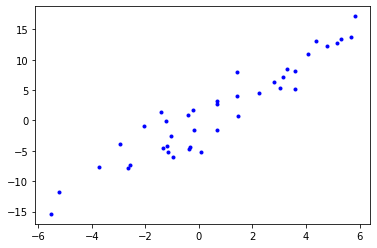

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

linear_data = pd.read_csv('data/linear.csv')
linear_data = linear_data.sort_values('x')

x = linear_data['x'].values.reshape(-1, 1)
y = linear_data['y'].values.reshape(-1, 1)

plt.plot(x, y, 'b.')

Run the k-fold cross validation for both regressors and get the average error:

In [ ]:
np.random.seed(42)

clf_lr, scores_lr = estimator_cross_fold(x, y, 5, clf_choice='linear')
assert math.isclose(-7.907250808383319, scores_lr.mean())

clf_sgd, scores_sgd = estimator_cross_fold(x, y.flatten(), 5, clf_choice='sgd')
assert math.isclose(-7.653262471797137, scores_sgd.mean())

We would conclude then that the SGDRegressor is better for this data in estimating unseen examples. This does not mean that the error for all data will be smaller, but it means that when holding out data, the SGDRegressor is slightly better at classifying new examples. Actually, both estimators for this particular use case are quite similar:

In [ ]:
y_hat_linear = clf_lr.predict(x)
y_hat_sgd = clf_sgd.predict(x)

plt.plot(x, y, 'b.')
plt.plot(x, y_hat_linear, 'r-')
plt.plot(x, y_hat_sgd, 'g-')

print('Error for full dataset for linear regressor: {}'.format(sklearn_mean_squared_error(y_hat_linear, y)))
print('Error for full dataset for SGD: {}'.format(sklearn_mean_squared_error(y_hat_sgd, y)))
